# Time Series - ARIMA Forecasting - Generate & Fit Data

#Rob Rappa
#11/10/19

#Source - DataCamp - Forecasting Using ARIMA in Python

In [2]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt

#Augmented Dickey-Fuller
# Used to test stationarity
# Null hypothesis: time series is non-stationary
# If p-value is low, time series is stationary
# If p-value is high, time series may be stationary
from statsmodels.tsa.stattools import adfuller

#ARMA Process
from statsmodels.tsa.arima_process import arma_generate_sample

#ARMA Model
from statsmodels.tsa.arima_model import ARMA

#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate ARMA Data

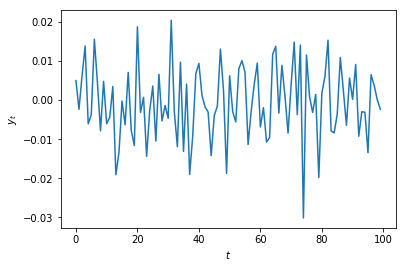

In [5]:
##Generate data

np.random.seed(42)

#ARMA(1,1)
ar_coefs = [1, -0.5]  #Negate coefficients here
ma_coefs = [1, -0.7]

y_test = arma_generate_sample(ar_coefs,ma_coefs,nsample=100, sigma=0.01)

plt.plot(y_test)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

# Fit ARIMA Model

In [9]:
##Test fitting this model with ARMA

#Define model object
model_test = SARIMAX(y_test,order=(1,0,1))

#Fit
results=model_test.fit()

#Summary
print(results.summary())


#Prob(Q)  = Ljung-Box   = p-value for null hypothesis that residuals are uncorrelated.  Looks high here, so good.
#Prob(JB) = Jarque-Bera =  p-value for null hypothesis that residuals are normal.  Looks high here, so good.

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 327.467
Date:                Mon, 11 Nov 2019   AIC                           -648.934
Time:                        16:00:46   BIC                           -641.118
Sample:                             0   HQIC                          -645.771
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6180      0.197      3.136      0.002       0.232       1.004
ma.L1         -0.8221      0.130     -6.302      0.000      -1.078      -0.566
sigma2      8.361e-05   1.24e-05      6.730      0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 327.467
Date:                Mon, 11 Nov 2019   AIC                           -648.934
Time:                        16:00:36   BIC                           -641.118
Sample:                             0   HQIC                          -645.771
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6180      0.197      3.136      0.002       0.232       1.004
ma.L1         -0.8221      0.130     -6.302      0.000      -1.078      -0.566
sigma2      8.361e-05   1.24e-05      6.730      0.0

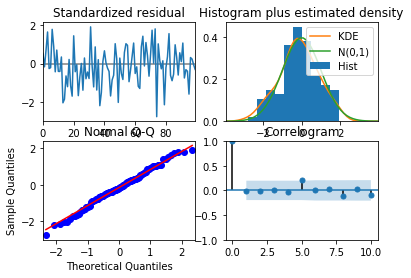

In [10]:
##Diagnostics

#Residual plot - no obvious pattern
#Histogram - smoothed version (original) looks Normal
#Normal Distribution QQ Plot - looks linear
#Correlogram for residuals - all look statistically insignificant
results.plot_diagnostics()
plt.show()